# 0. Импорты и определения

In [1]:
import pandas as pd
import numpy as np
import math as mth
import scipy.stats as stats
import random
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [2]:
sns.set_style('darkgrid')

In [4]:
# Функция для создания гистограммы

def create_histplot(df, 
                    x, 
                    bins=10, 
                    title='', 
                    xlabel='', 
                    ylabel='', 
                    vline=None, 
                    figsize=(14, 6)):
    
    fig, ax = plt.subplots(figsize=figsize)    
    sns.histplot(data=df, 
                 x=x, 
                 bins=bins,
                 ax=ax)    
    if vline:
        ax.axvline(x=vline, color='black')        
    ax.set(title=title, 
           xlabel=xlabel, 
           ylabel=ylabel) 
    plt.show();

In [5]:
# Функция для создания нескольких боксплотов с разбивкой по категориальному признаку

def create_boxplots(df, 
                    x, 
                    y, 
                    title='', 
                    xlabel='', 
                    ylabel='', 
                    figsize=(14, 6)):
    
    fig, ax = plt.subplots(figsize=figsize)   
    sns.boxplot(data=df, 
                x=x, 
                y=y,
                color='#1f77b4',
                ax=ax)   
    ax.set(title=title, 
           xlabel=xlabel, 
           ylabel=ylabel)   
    plt.show();

In [6]:
# Функция для создания барчарта

def create_barchart(df, 
                    x, 
                    y, 
                    xlabel, 
                    ylabel, 
                    title, 
                    vline_x=0, 
                    figsize=(14, 6)): 

    fig, ax = plt.subplots(figsize=figsize)  
    sns.barplot(data=df, 
                x=x, 
                y=y,
                color='#1f77b4',
                ax=ax)  
    ax.set(title=title, 
           xlabel=xlabel, 
           ylabel=ylabel)
    ax.bar_label(ax.containers[0], 
                 fmt='%.0f', 
                 label_type='edge',
                 padding=1)
    if vline_x != 0:       
        plt.axvline(x=vline_x, 
                    color = 'black', 
                    linewidth=2, 
                    linestyle='dotted')
    plt.show();

In [7]:
# Функция для создания линейного графика

def lineplot(df, 
             x, 
             y, 
             xlabel, 
             ylabel, 
             title, 
             hue=None, 
             figsize=(12, 6)): 

    fig, ax = plt.subplots(figsize=figsize)
    if hue:
        sns.lineplot(data=df,
                     x=x,
                     y=y,
                     hue=hue,
                     ax=ax)
    else:
        sns.lineplot(data=df,
                     x=x,
                     y=y,
                     ax=ax)   
    ax.set(title=title, 
           xlabel=xlabel, 
           ylabel=ylabel)    
    plt.show();

In [8]:
# Функция для конкатенации непустых значений в столбцах датафрейма

def concat_columns_values(values_list):
    
    s = ''
    for value in values_list:
        if value != '':
            s = s + value + ', '
   
    if s[-2:] == ', ':
        s = s[:-2]        
    return s

In [9]:
# Функция для расчета z-статистики

def z_test(sample_a, sample_b, two_sided=True):
    
    # Считаем доли пользователей, совершивших событие, для каждой выборки    
    p_a = sample_a.mean()
    p_b = sample_b.mean()
    
    # Считаем разницу в долях между выборками
    difference = p_a - p_b
    
    # Считаем доли пользователей, совершивших событие, для объединенной выборки
    p = pd.concat([sample_a, sample_b]).mean()    
    
    # Считаем статистику
    z_value = difference / mth.sqrt(p * (1 - p) * (1/len(sample_a) + 1/len(sample_b)))
    
    # Задаем нормальное распределение
    distribution = stats.norm(0, 1)
    
    # Считаем p-value
    if two_sided:
        p_value = (1 - distribution.cdf(abs(z_value))) * 2
    else:
        p_value = (1 - distribution.cdf(abs(z_value)))
    
    return difference, p_value

In [10]:
# Функция для фильтрации выборки из датасета

def get_sample(df, group_name, event_name_short):
    
    events_number = (
        df.query('group in @group_name and event_name_short in @event_name_short')
        ['user_id'].nunique()
    )
        
    users_number = (
        df.query('group in @group_name')
        ['user_id'].nunique()
    )
    
    sample = [0] * (users_number - events_number)
    sample.extend([1] * events_number)
    sample = pd.Series(sample)
    
    return sample

In [11]:
# Функция для условного форматирования текста
def color_thresh_red(val):
    color = 'red' if val >= 0.05 else 'black'
    return 'color: %s' % color

# 1. Загрузка и подготовка данных

На этом этапе мы загрузим данные логов, изучим общую информацию, проверим пропуски и типы данных. На выходе мы должны получить датасет, готовый к исследовательскому анализу.

In [12]:
logs_raw = pd.read_csv('')

logs_raw.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [13]:
logs_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [14]:
print(
    'В датафрейме {0} дублированных записей. Это {1}% от всего датафрейма'
    .format(logs_raw[logs_raw.duplicated()].shape[0], 
           round(100 * logs_raw[logs_raw.duplicated()].shape[0] / logs_raw.shape[0], 2))
)

В датафрейме 413 дублированных записей. Это 0.17% от всего датафрейма


Всего в датафрейме 244126 записей, пропусков нет. Есть 413 дублированных строк, скорее всего ошибка сбора данных, это немного относительно всего датафрейма (0.17%), поэтому можем их безопасно удалить.

Сохраним данные в отдельный датафрейм, далее будем работать с ним. В датафрейме переименуем столбцы, удалим дубликаты.

In [15]:
logs = logs_raw.copy()

logs.columns = ['event_name', 'user_id', 'event_timestamp', 'group']

logs = logs.drop_duplicates().reset_index(drop=True)

В наших даных есть столбец *event_timestamp* типа int64, содержащий таймстэмпы событий. Из него мы извлечем дату и время событий.

Столбец с группой A/B-теста сделаем строковым.

In [16]:
logs['event_datetime'] = pd.to_datetime(logs['event_timestamp'], unit='s')
logs['event_date'] = pd.to_datetime(logs['event_datetime'].dt.date).dt.date

logs['group'] = logs['group'].astype(str)

Сразу проверим, что между пользователями разных групп нет пересечений: каждый пользователей должен попасть только в одну группу.

In [17]:
for groups in ((246, 247), (246, 248), (247, 248)):
    group_a_users = logs.loc[logs['group']==groups[0], 'user_id'].unique()
    group_b_users = logs.loc[logs['group']==groups[1], 'user_id'].unique()
    groups_intersection = np.intersect1d(group_a_users, group_b_users)
    if len(groups_intersection) > 0:
        print('Между группами {0} и {1} есть пересечение пользователей'.format(groups[0], groups[1]))
        print()
    else:
        print('Между группами {0} и {1} нет пересечения пользователей'.format(groups[0], groups[1]))
        print()

Между группами 246 и 247 нет пересечения пользователей

Между группами 246 и 248 нет пересечения пользователей

Между группами 247 и 248 нет пересечения пользователей



In [18]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243713 entries, 0 to 243712
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       243713 non-null  object        
 1   user_id          243713 non-null  int64         
 2   event_timestamp  243713 non-null  int64         
 3   group            243713 non-null  object        
 4   event_datetime   243713 non-null  datetime64[ns]
 5   event_date       243713 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 11.2+ MB


Теперь у нас есть датафрейм без дубликатов, с верными типами данных и с двумя столбцами дат, которые пригодятся нам в дальнейшем анализе. Пользователи верно распределены по группам: каждый человек попал только в одну группу.

# 2. Исследовательский анализ

На этом этапе изучим наши данные подробнее, ответим на основные вопросы о них:

- сколько всего событий в логе?
- сколько всего пользователей в логе?
- как распределено количество событий на пользователя?
- данными за какой период мы располагаем? 
- равномерно ли экспериментальные группы представлены в данных?

## 2.1. Анализ распределения количества событий и пользователей
Посмотрим, сколько всего в логах событий, пользователей и как распределено число событий на пользователя.

In [19]:
print(
    'Общее число событий в логах: {}'.format(logs.shape[0])
)

print(
    'Общее число пользователей в логах: {}'.format(len(logs['user_id'].unique()))
)

Общее число событий в логах: 243713
Общее число пользователей в логах: 7551


In [20]:
events_per_user = (
    logs.groupby(['user_id'], 
                 as_index=False)
    .agg(event_count=('event_name', 'count'))
)

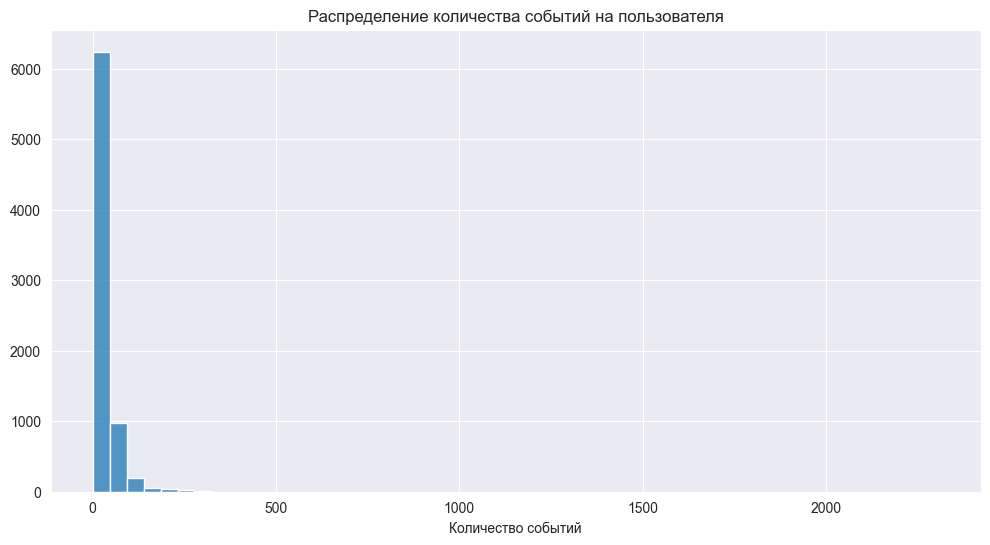

In [21]:
create_histplot(events_per_user,
                x='event_count',
                title='Распределение количества событий на пользователя',
                xlabel='Количество событий',
                bins=50,
                figsize=(12, 6))

In [22]:
events_per_user['event_count'].describe()

count    7551.000000
mean       32.275593
std        65.154219
min         1.000000
25%         9.000000
50%        20.000000
75%        37.000000
max      2307.000000
Name: event_count, dtype: float64

В среднем пользователь совершает 32 события, медианное значение - 20. У распределения есть длинный хвост вправо, а также выбросы - аномальные значения. Максимальное значение количества событий - 2307.

Добавим в датафрейм столбец-признак аномального пользователя - пользователя с аномальным количеством событий (возьмем как ориентир 95 квантиль распределения).

In [23]:
q95 = events_per_user['event_count'].quantile(0.95)
anomaly_user_ids = events_per_user.query('event_count >= @q95')['user_id'].unique()
anomaly_pct = 100 * round(len(anomaly_user_ids) / logs.user_id.nunique(), 2)

print(
    f'Количество аномальных пользователей равно {len(anomaly_user_ids)}'\
    f' ({anomaly_pct}% всех пользователей)')

Количество аномальных пользователей равно 385 (5.0% всех пользователей)


In [24]:
logs['user_type'] = np.where(logs['user_id'].isin(anomaly_user_ids), 'anomaly', 'regular')

Кроме того, нам нужно будет убедиться, что это распределение имеет похожую форму во всех группах эксперимента. Это мы сделаем на этапе анализа представленности групп.

## 2.2. Анализ динамики количества событий

Сначала посмотрим, какие даты событий у нас в датафрейме.

In [25]:
print(
    'Первая дата событий в логах: {}'.format(logs['event_date'].min())
)

print(
    'Последняя дата событий в логах: {}'.format(logs['event_date'].max())
)

Первая дата событий в логах: 2019-07-25
Последняя дата событий в логах: 2019-08-07


Данные у нас за период с 25 июля до 7 августа, т.е. две недели. Оценим, насколько равномерно распределены события по датам:

In [26]:
events_by_date = (
    logs.groupby('event_date', as_index=False)
    .agg(event_count=('event_name', 'count'))
)

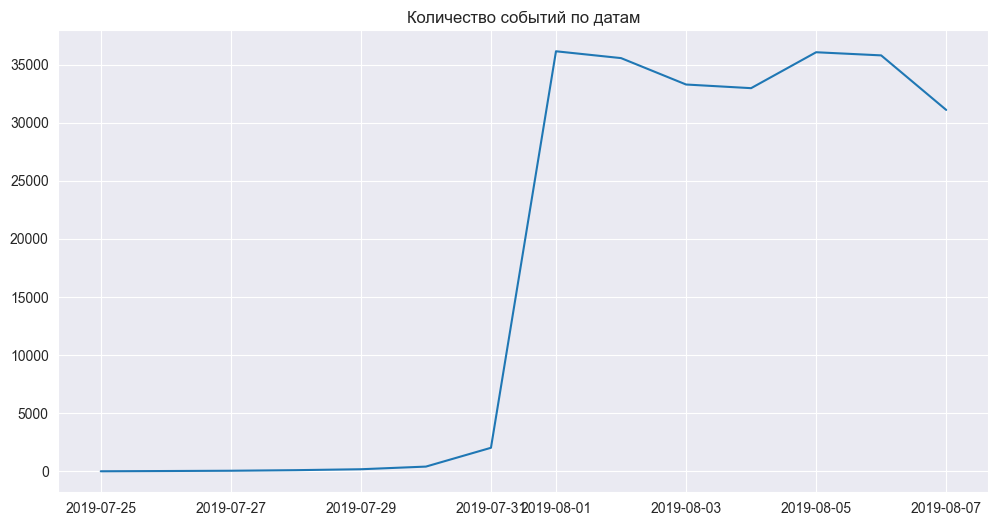

In [27]:
lineplot(events_by_date, 
         x='event_date', 
         y='event_count', 
         xlabel='', 
         ylabel='', 
         title='Количество событий по датам', 
         figsize=(12, 6))

По графику видим, что данных за первую неделю очень мало. Вероятная причина этого в том, что в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого. Это будет искажать картину, поэтому мы уберем из датасета данные до 1 августа. Таким образом, период наших данных сократится до одной недели.

In [28]:
n_records_full = logs.shape[0]
n_users_full = logs['user_id'].nunique()

logs = logs.loc[logs['event_datetime'] > '2019-07-31']

n_records_filtered = logs.shape[0]
n_users_filtered = logs['user_id'].nunique()

n_records_diff = round(100 * (n_records_full - n_records_filtered) / n_records_full, 2)
n_users_diff = round(100 * (n_users_full - n_users_filtered) / n_users_full, 2)

print(
    'При фильтрации по дате мы удалили {0} записей ({1}% от полного датасета)'
    .format(n_records_full - n_records_filtered, n_records_diff)
)
    
print(
    'При фильтрации по дате мы удалили {0} пользователей ({1}% от полного датасета)'
    .format(n_users_full - n_users_filtered, n_users_diff)
)

При фильтрации по дате мы удалили 796 записей (0.33% от полного датасета)
При фильтрации по дате мы удалили 9 пользователей (0.12% от полного датасета)


Получается, что при сокращении периода анализа мы потеряли 17 пользователей и почти 3 тысячи событий. В относительном выражении это незначительные потери (чуть больше 1% событий и меньше процента пользователей). Так что такое сокращение датасета не повредит нашему анализу.

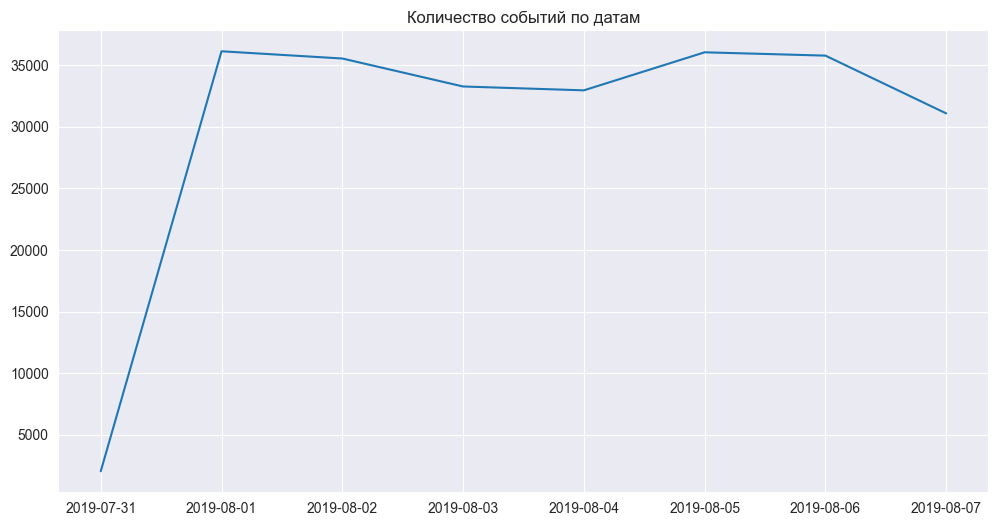

In [29]:
events_by_date = (
    logs.groupby('event_date', as_index=False)
    .agg(event_count=('event_name', 'count'))
)

lineplot(events_by_date, 
         x='event_date', 
         y='event_count', 
         xlabel='', 
         ylabel='', 
         title='Количество событий по датам', 
         figsize=(12, 6))

Теперь распределение событий по датам выглядит более равномерным. Можем отметить, что есть колебания количества событий: снижение в течение первых 4 дней, затем восстановление до значений первого дня, и снижение в последний день.

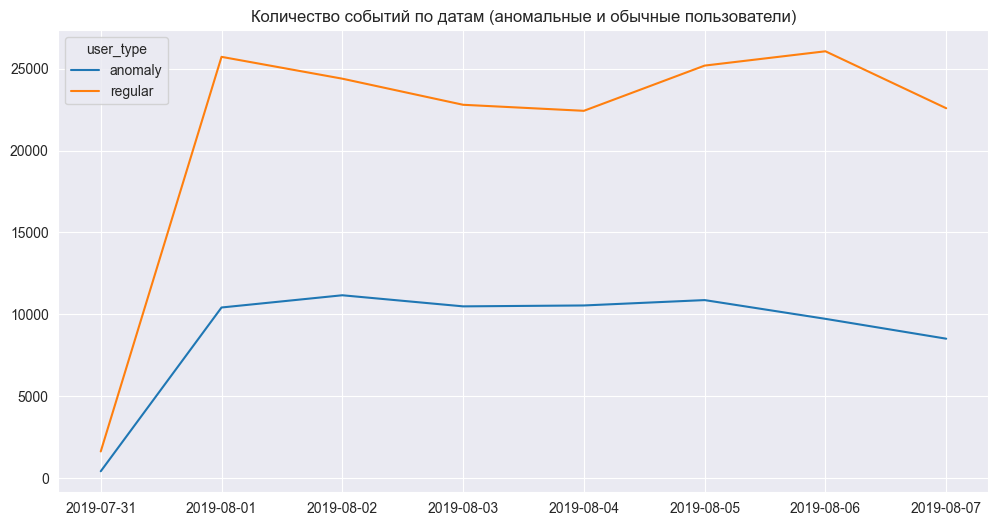

In [30]:
events_by_date_user_type = (
    logs.groupby(['event_date', 'user_type'], 
                 as_index=False)
    .agg(event_count=('event_name', 'count'))
)

lineplot(events_by_date_user_type, 
         x='event_date', 
         y='event_count', 
         hue='user_type',
         xlabel='', 
         ylabel='', 
         title='Количество событий по датам (аномальные и обычные пользователи)', 
         figsize=(12, 6))

Аномальные пользователи ежедневно совершают гораздо больше событий, чем обычные пользователи. 

При этом у аномальных пользователей более изменчивая динамика: видно падение количества событий в течение первых 4 дней, а затем рост до прежних значений. Это похоже на ту картину, что мы наблюдали на предыдущем графике по датасету в целом. Значит аномальные пользователи вносят большой вклад в общую картину.

У обычных пользователей другой характер динамики: ко второму дню количество событий растет, затем чуть снижается и выходит на плато, а после 5 дня снижается более резко.

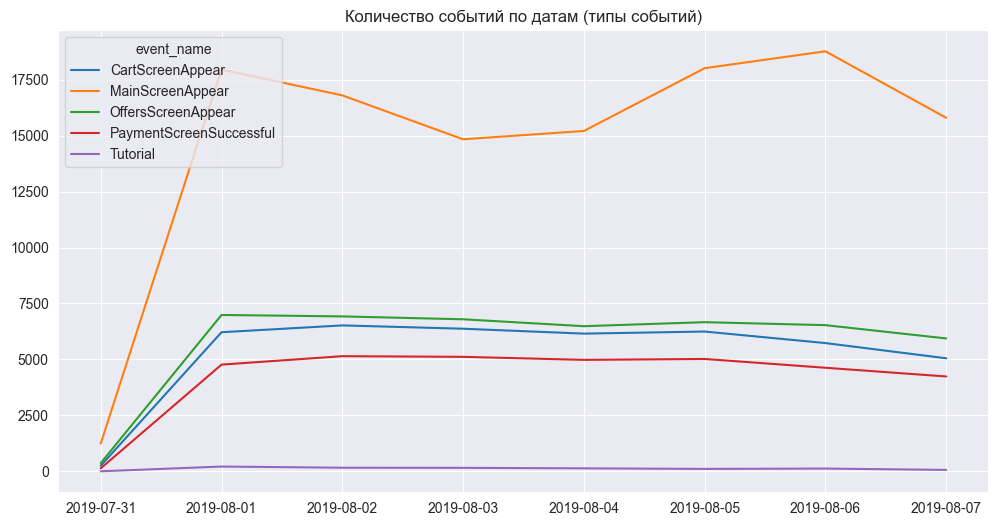

In [31]:
events_by_date_event_type = (
    logs.groupby(['event_date', 'event_name'], 
                 as_index=False)
    .agg(event_count=('event_name', 'count'))
)

lineplot(events_by_date_event_type, 
         x='event_date', 
         y='event_count', 
         hue='event_name',
         xlabel='', 
         ylabel='', 
         title='Количество событий по датам (типы событий)', 
         figsize=(12, 6))

Все типы событий распределены по датам довольно равномерно. 

Скачки видны только у события Main Screen - снижение в течение первых двух дней, затем рост до прежних значений (такую же динамику мы видели и на общем графике по событиям, и в разбивке по аномальным пользователям, теперь мы значем, что это вклад именно события Main Screen и аномальных пользователей). 

Количество событий Main Screen заметно превышает количество всех остальных событий, что интуитивно понятно - пользователи чаще всего оказываются именно на главном экране приложения.

Меньше всего событий Tutorial.

## 2.3. Анализ представленности групп

Важная часть проекта - это анализ результатов A/B-теста. На этапе подготовки данных мы уже проверили, что пересечений между группами нет. Теперь проверим, как экспериментальные группы представлены в данных:
- посчитаем, сколько событий в каждой группе
- сколько пользователей в каждой группе
- каково среднее количество событий на человека по группам

In [32]:
group_stat = (
    logs.pivot_table(index='group',
                     values='user_id',
                     aggfunc=['count', pd.Series.nunique])
)

group_stat.columns = ['event_count', 'user_count']
group_stat = group_stat.reset_index()

group_stat['events_per_user'] = (
    round(group_stat['event_count'] / group_stat['user_count'])
)
group_stat['event_share'] = (
    round(100 * group_stat['event_count'] / group_stat['event_count'].sum(), 2)
)
group_stat['user_share'] = (
    round(100 * group_stat['user_count'] / group_stat['user_count'].sum(), 2)
)

group_stat = group_stat.sort_values(by='group', ascending=False)

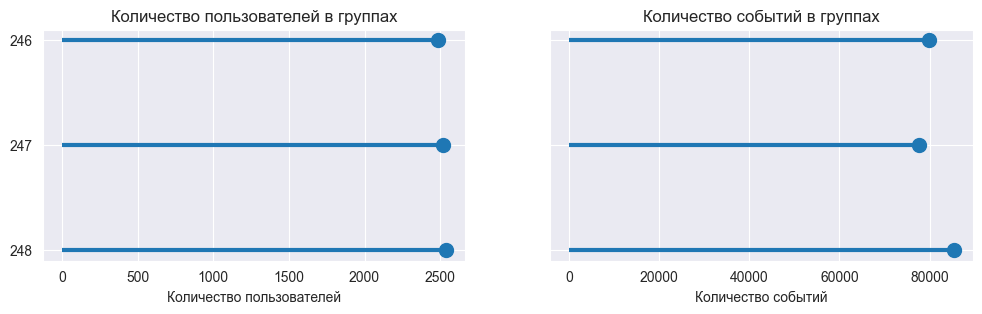

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3), sharey=True)

ax_range=range(1,len(group_stat.index)+1)

ax1.plot(group_stat['user_count'], 
         ax_range, 
         'o', 
         markersize=10.0)
ax1.hlines(y=ax_range, 
           xmin=0, 
           xmax=group_stat['user_count'],
           linewidths=3.0)

ax2.plot(group_stat['event_count'], 
         ax_range, 
         'o', 
         markersize=10.0)
ax2.hlines(y=ax_range, 
           xmin=0, 
           xmax=group_stat['event_count'],
           linewidths=3.0)

plt.yticks(ax_range, group_stat['group'])

ax1.set(title='Количество пользователей в группах',
        xlabel='Количество пользователей',
        ylabel='')

ax2.set(title='Количество событий в группах',
        xlabel='Количество событий',
        ylabel='')

plt.show();

In [34]:
(
    group_stat[['group', 'user_share', 'event_share']]
    .sort_values(by='group')
    .style
    .hide()
    .format({'event_share': '{:.2f}%',
             'user_share': '{:.2f}%'})
    .background_gradient(cmap='Blues', 
                         subset=['event_share', 'user_share'])
)

group,user_share,event_share
246,32.95%,32.90%
247,33.37%,31.98%
248,33.68%,35.12%


Из сводной таблицы и графиков видим, что пользователи распределены по группам довольно равномерно, хотя небольшие различия есть. В группу 246 попало 32.95% пользователей, в группу 247 - 33.37%, в группу 248 - 33.68%. В каждой группе примерно 2500 пользователей.

В количестве событий видим разницу: на группу 246 приходится 32.9% всех событий, на группу 247 - 31.98%, на группу 248 - 35.12% событий. Какова природа этих различий и являются ли эти различия случайными, мы высяним далее в разделе Анализ результатов A/B-теста.

Нам осталось посмотреть на распределение количества событий на одного пользователя в разрезе групп. Суммируем количество событий для пользователя и построим боксплоты по группам.

In [35]:
events_group_distribution = (
    logs.groupby(['user_id', 'group'], 
                 as_index=False)
    .agg(event_count=('event_name', 'count'))
)

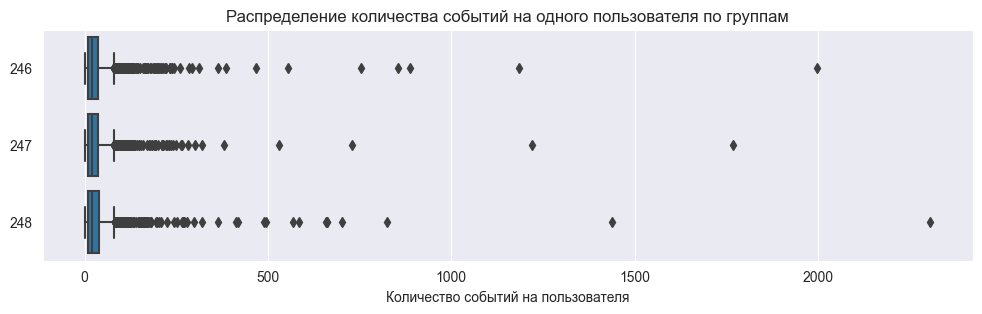

In [36]:
create_boxplots(events_group_distribution, 
                x='event_count', 
                y='group', 
                title='Распределение количества событий на одного пользователя по группам', 
                xlabel='Количество событий на пользователя', 
                ylabel='', 
                figsize=(12, 3))

Отдельно выведем распределение без аномальных пользователей, чтобы было лучше видно основную часть.

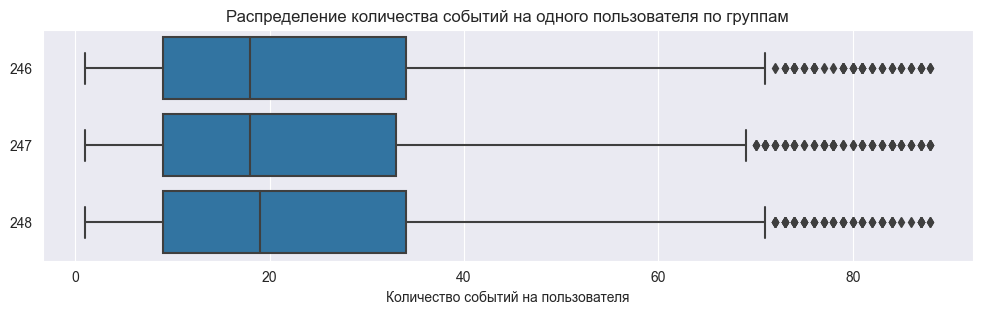

In [37]:
create_boxplots(events_group_distribution.query('user_id not in @anomaly_user_ids'), 
                x='event_count', 
                y='group', 
                title='Распределение количества событий на одного пользователя по группам', 
                xlabel='Количество событий на пользователя', 
                ylabel='', 
                figsize=(12, 3))

In [38]:
groups_describe = pd.DataFrame()

for group in events_group_distribution['group'].unique():
    
    groups_describe[group]  = (
        events_group_distribution.query('group == @group')['event_count']
        .describe()
    )
    
(
    groups_describe.T
    .style
    .format({'count': '{:.0f}',
             'mean': '{:.2f}',
             'std': '{:.2f}',
             'min': '{:.0f}',
             '25%': '{:.0f}',
             '50%': '{:.0f}',
             '75%': '{:.0f}',
             'max': '{:.0f}',}
           )
    .background_gradient(cmap='Blues')
)

,count,mean,std,min,25%,50%,75%,max
246,2485,32.16,65.14,1,9,19,37,1998
247,2517,30.86,56.33,1,9,19,37,1768
248,2540,33.59,72.96,1,9,20,38,2307


Основные части распределений у групп похожи: минимум у всех 1 событие на пользователя, медиана 19-20 событий, 75 персентиль - 37-38 событий. Однако среднее количество событий, стандартное отклонение и максимум у группы 248 выше, чем у групп 246 и 247. Это видно и на графике - выбросы у группы 248 расположены правее, чем у других групп.

# 3. Воронка событий

После подготовки и исследовательского анализа мы наконец можем построить воронку событий. Для этого мы:
- изучим, какие события есть в логах, рассчитаем их частотность
- изучим, сколько пользователей совершали каждое из событий, только одно событие
- выстроим события в последовательную цепочку, ведущую к конверсии
- посчитаем воронку: какая доля пользователей переходит с одного шага на другой, какая доля пользователей совершает покупку
- определим, на каком шаге мы теряем больше всего пользователей

## 3.1. Типы событий и их частота

Частично мы уже изучали этот вопрос, когда строили график динамики количества событий. Теперь же посмотрим более подробно, какие типы событий есть в логах, как часто они встречаются.

In [39]:
print(
    'В логах {} типов событий'.format(len(logs['event_name'].unique()))
)

В логах 5 типов событий


Расшифруем типы событий:

|Значение *event_name*|Описание события|
|---|---|
|MainScreenAppear|Пользователь попал на главный экран приложения|
|PaymentScreenSuccessful|Пользователю открылся экран удачного платежа|
|CartScreenAppear|Пользователь попал на экран Корзины|
|OffersScreenAppear|Пользователь попал на экран товаров|
|Tutorial|Пользователь попал в туториал|

In [40]:
# Сократим названия событий, чтобы они более понятно смотрелись при визуализации

events_names_short = {'MainScreenAppear': 'Main Screen',
                          'PaymentScreenSuccessful': 'Payment',
                          'CartScreenAppear': 'Cart',
                          'OffersScreenAppear': 'Offers',
                          'Tutorial': 'Tutorial'}

logs['event_name_short'] = logs['event_name'].apply(lambda x: events_names_short[x])

Сгруппируем события по типу и посмотрим на частотность.

In [41]:
events_stat = (
    logs.pivot_table(index='event_name_short',
                     values='user_id',
                     aggfunc='count')
    .rename(columns={'user_id': 'count'})
    .sort_values(by='count', ascending=False)
)

events_stat['share'] = round((100 
                                 * events_stat['count'] 
                                 / events_stat['count'].sum()), 
                                2)

events_stat = events_stat.reset_index()

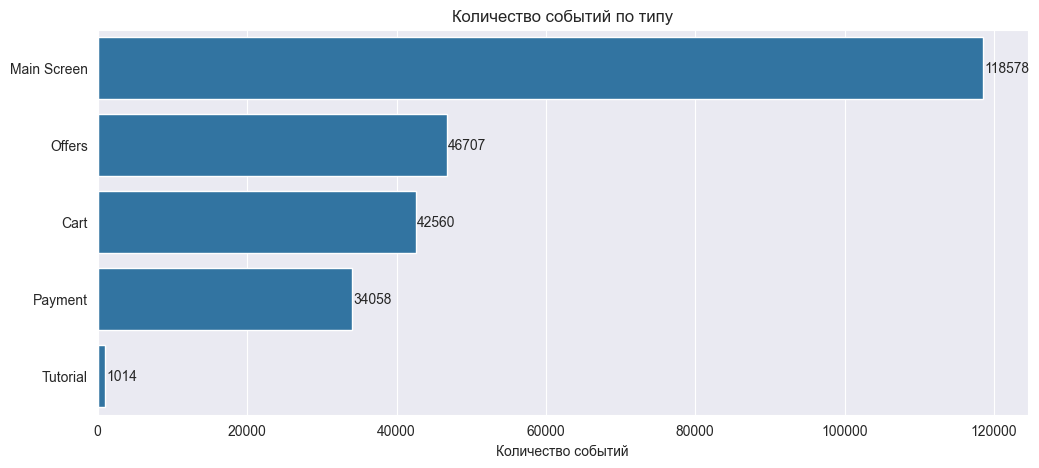

In [42]:
create_barchart(events_stat, 
                x='count', 
                y='event_name_short', 
                xlabel='Количество событий', 
                ylabel='', 
                title='Количество событий по типу',  
                figsize=(12, 5))

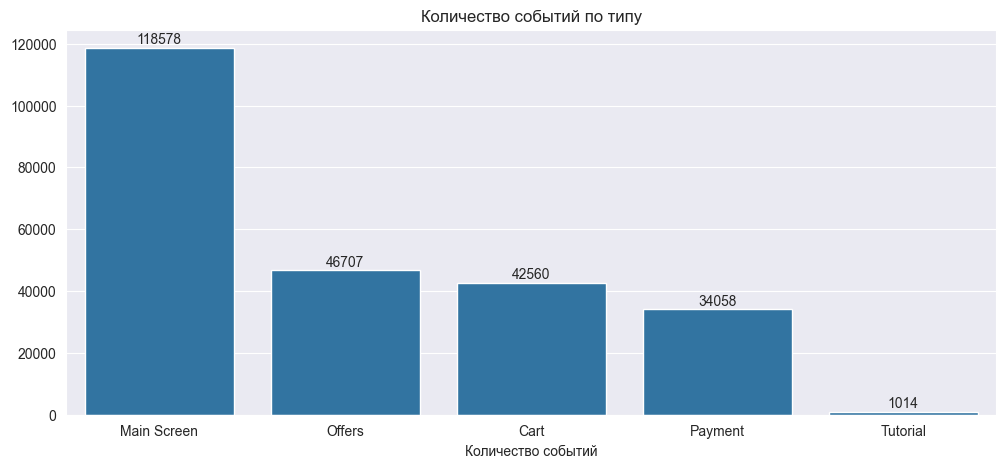

In [43]:
create_barchart(events_stat, 
                y='count', 
                x='event_name_short', 
                xlabel='Количество событий', 
                ylabel='', 
                title='Количество событий по типу',  
                figsize=(12, 5))

In [44]:
(
    events_stat.style
    .hide()
    .format({'share': '{:.2f}%'})
    .background_gradient(cmap='Blues', 
                         subset=['count', 'share'])
)

event_name_short,count,share
Main Screen,118578,48.81%
Offers,46707,19.23%
Cart,42560,17.52%
Payment,34058,14.02%
Tutorial,1014,0.42%


Из сводной таблицы и графика видим, что самым частым событием является *Main Screen* - появление главного экрана, оно составляет почти половину всех событий. На втором месте *Offers* - появление экрана выбора продуктов (19% всех событий), далее идут *Cart* - появление экрана корзины (17% всех событий) и *Payment* (14% всех событий) - появление экрана успешного платежа. Самым редким событием является *Tutorial* (меньше 1% от всех событий).

## 3.2. Комбинации типов событий и их частота

Очевидно, что путь пользователя в приложении не является строго заданным: ему не обязательно выполнять все 5 шагов в определенном порядке, у него есть свобода действий. Поэтому нам нужно проверить, каковы самые распространенные комбинации событий для пользователей, сколько пользователей совершили каждое из этих 5 событий, сколько пользователей совершили лишь одно событие.

In [45]:
user_events_stat = (
    logs.pivot_table(index='user_id', 
                     values='event_name_short', 
                     aggfunc=pd.Series.nunique)
    .reset_index()
    .rename(columns={'event_name_short': 'event_count_unique'})
)

In [46]:
user_events_stat_pct = (
    user_events_stat.groupby(by='event_count_unique', as_index=False)
    .agg({'user_id': 'count'})
    .rename(columns={'user_id': 'user_count'})
)

user_events_stat_pct['user_pct'] = (
    round(100 * user_events_stat_pct['user_count'] / user_events_stat_pct['user_count'].sum(), 2)
)

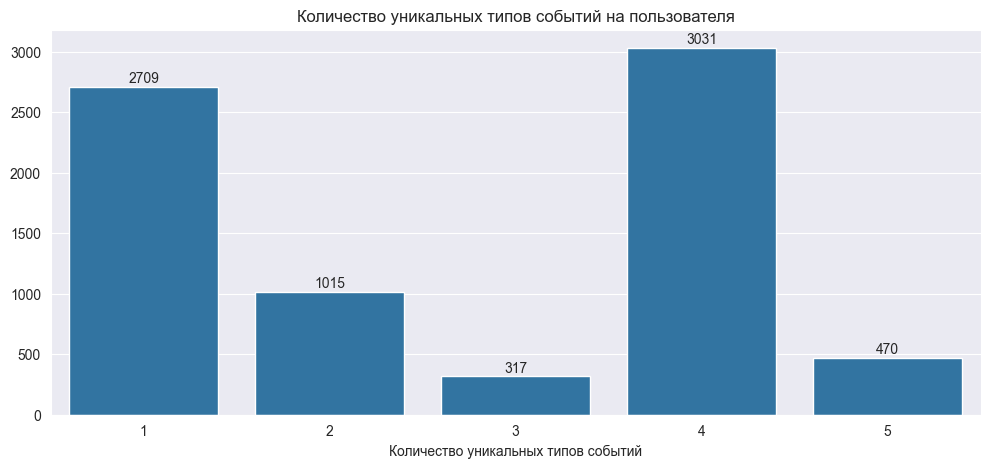

In [47]:
create_barchart(user_events_stat_pct, 
                x='event_count_unique', 
                y='user_count', 
                xlabel='Количество уникальных типов событий', 
                ylabel='', 
                title='Количество уникальных типов событий на пользователя',  
                figsize=(12, 5))

In [48]:
(
    user_events_stat_pct.style
    .hide()
    .format({'user_pct': '{:.2f}%'})
    .background_gradient(cmap='Blues', 
                         subset=['user_count', 'user_pct'])
)

event_count_unique,user_count,user_pct
1,2709,35.92%
2,1015,13.46%
3,317,4.20%
4,3031,40.19%
5,470,6.23%


Только 6% пользователей совершали все 5 событий. Самый распространенный вариант: это 4 события (40%) или 1 событие (36% пользователей). Остается понять, какие именно 4 события совершают 40% наших пользователей.

In [49]:
# Соберем в отдельную колонку комбинации событий, совершенных каждым пользователем 

user_events_table = (
    logs.pivot_table(index='user_id', 
                 columns='event_name_short', 
                 values='event_date', 
                 aggfunc=lambda x: '+', 
                 fill_value='')
)

for column in user_events_table.columns:
    user_events_table[column] = user_events_table[column].str.replace('+', column, regex=False)
    
user_events_table['combination'] = user_events_table.apply(concat_columns_values, axis=1)

user_events_table = user_events_table.reset_index()

# Для каждой полученной комбинации посчитаем, количество пользователей

user_events_table = (
    user_events_table.groupby('combination', as_index=False)
    .agg({'user_id': 'count'})
    .sort_values(by='user_id', ascending=False)
    .reset_index(drop=True)
    .rename(columns={'user_id': 'count'})
)

In [50]:
user_events_table.style.hide()

combination,count
"Cart, Main Screen, Offers, Payment",2964
Main Screen,2695
"Main Screen, Offers",792
"Cart, Main Screen, Offers, Payment, Tutorial",470
"Main Screen, Tutorial",180
"Main Screen, Offers, Tutorial",114
"Cart, Offers, Payment",96
"Cart, Main Screen, Offers",86
"Cart, Main Screen, Offers, Tutorial",66
"Cart, Main Screen",40


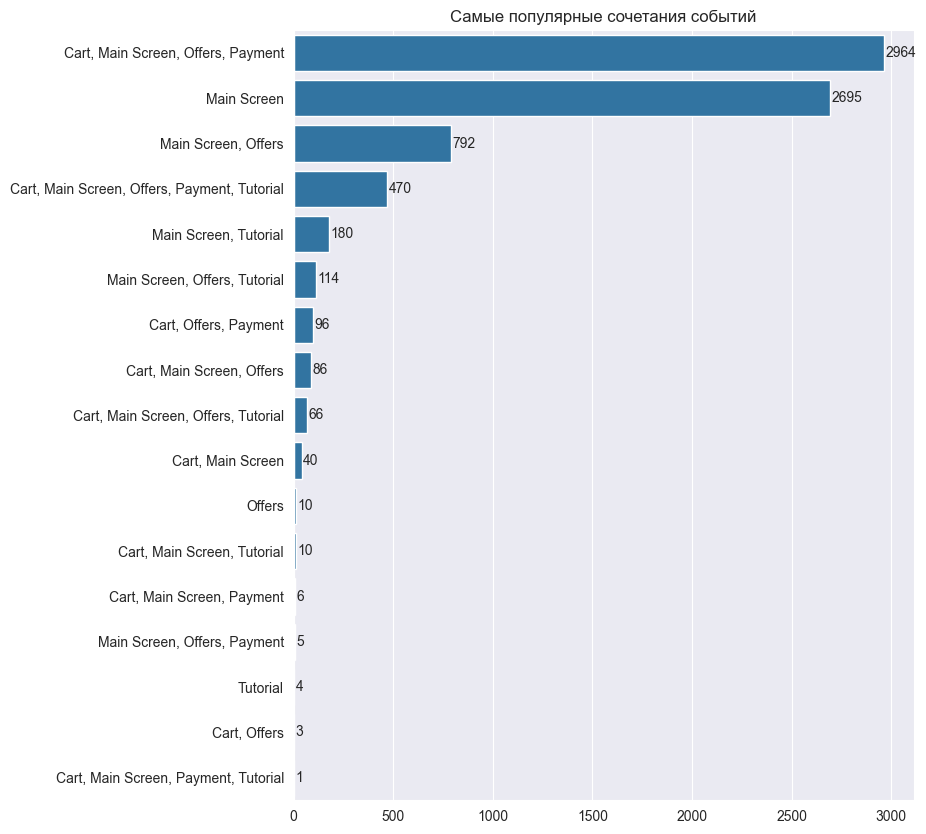

In [51]:
create_barchart(user_events_table,
               x='count',
               y='combination',
                xlabel='',
                ylabel='',
               title='Самые популярные сочетания событий',
               figsize=(8, 10))

Видим, что наиболее частой комбинацией событий является '*Cart, Main Screen, Offers, Payment*', она встречается у 2964 человек. Из этих событий выстраивается распространенный пользовательский путь, на основе которого мы уже можем сформировать продуктовую воронку:

1. Заход в приложение на главный экран
2. Переход на страницу с товарами (+ добавление товара в корзину, но это событие у нас не отслеживается)
3. Переход в корзину
4. Платеж

На втором месте по распространенности событий - просто посещение главного экрана *Main Screen*, 2695 пользователи совершили только это событие. Это не очень хороший показатель: потенциальный клиент даже не доходит до страницы с товарами, а сразу покидает приложение. Вероятно, главный экран - это узкое место нашего приложения, что-то на нем отпугивает пользователей.

Остальные варианты комбинаций намного менее распространенные, они охватывают менее 1000 пользователей. Например, полный набор событий '*Cart, Main Screen, Offers, Payment, Tutorial*' прошли лишь 470 человек.

## 3.3. Воронка событий

На предыдущем этапе мы выяснили, какая комбинация событий является самой частой: *Cart, Main Screen, Offers, Payment*, и предположили, что эти события и являются нашей воронкой.

Таким образом, в продуктовую воронку мы не включаем событие *Tutorial* - оно встречается очень редко (скорее всего только для новых пользователей и при внедрении каких-то изменений на интерфейсе или новых фич) и не является обязательным в пользовательском пути.

Теперь мы можем рассчитать нашу воронку и выяснить, где у нас узкие места, сколько пользователей мы теряем и на каком шаге.

In [52]:
# Определяем список всех событий воронки
product_funnel = ['Main Screen', 'Offers', 'Cart', 'Payment']

# Фильтруем датафрейм так, чтобы в него входили только интересующие нас события
logs_funnel = logs[logs['event_name_short'].isin(product_funnel)]

# Строим воронку
product_funnel = (
    logs_funnel.groupby(by='event_name_short')
    .agg({'user_id': pd.Series.nunique})
    .rename(columns={'user_id': 'user_count'})
    .sort_values(by='user_count', ascending=False)
    .reset_index()
    .assign(user_share=lambda x: round(100 * x['user_count'] / logs_funnel['user_id'].nunique(),
                                      2),
            
            percent_from_previous_step=lambda x: round(
               100 * x['user_count'] / x['user_count'].shift(1, fill_value=x.loc[0, 'user_count']),
            2),
            percent_from_first_step=lambda x: round(
               100 * x['user_count'] / x.loc[0, 'user_count'], 
            2)
           )
)

In [53]:
(
    product_funnel[['user_count', 
                    'percent_from_previous_step', 
                    'percent_from_first_step']]
    .style
    .hide()
    .format({'user_count': '{:.0f}',
             'percent_from_previous_step': '{:.2f}%',
             'percent_from_first_step': '{:.2f}%'})
    .background_gradient('Blues')
)

user_count,percent_from_previous_step,percent_from_first_step
7429,100.00%,100.00%
4606,62.00%,62.00%
3742,81.24%,50.37%
3542,94.66%,47.68%


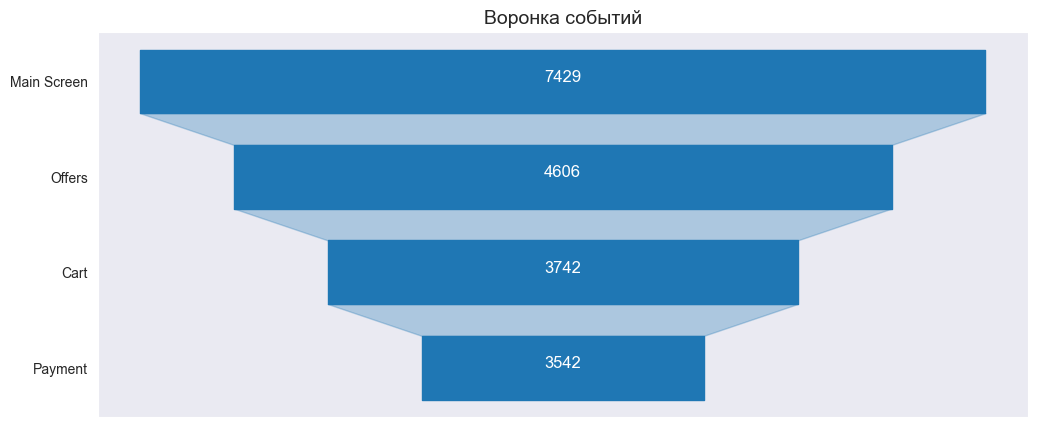

In [54]:
fig = plt.figure(figsize=(12, 5))

plt.fill_betweenx(y=[12,14], x1=[18,18], x2=[0,0], color='#1f77b4');
plt.fill_betweenx(y=[11,12], x1=[16,18], x2=[2,0], color='#1f77b4', alpha=0.3);
plt.fill_betweenx(y=[9,11], x1=[16,16], x2=[2,2], color='#1f77b4');
plt.fill_betweenx(y=[8,9], x1=[14,16], x2=[4,2], color='#1f77b4', alpha=0.3);
plt.fill_betweenx(y=[6,8], x1=[14,14], x2=[4,4], color='#1f77b4');
plt.fill_betweenx(y=[5,6], x1=[12,14], x2=[6,4], color='#1f77b4', alpha=0.3);
plt.fill_betweenx(y=[3,5], x1=[12,12], x2=[6,6], color='#1f77b4');

plt.yticks([4,7,10,13], product_funnel['event_name_short'][::-1]);
plt.xticks([],[]);

for y, val in zip([4,7,10,13],product_funnel['user_count'][::-1]):
    plt.text(9, y, val, ha='center', fontsize=12, color="white")

plt.grid(visible=False);
plt.title('Воронка событий', loc='center', fontsize=14);

На первом шаге (при переходе с главного экрана на экран с товарами) мы теряем почти 40% пользователей, на следующем шаге (при переходе с экрана товаров в корзину) мы теряем 19%, на последнем шаге (при совершении платежа) мы теряем около 5%.

То есть больше всего мы теряем пользователей с главного экрана, почти половина из них не идет дальше. Это подтверждает предположение, которое мы делали на этапе анализа комбинаций событий: главный экран является узким местом нашего приложения.

В целом, до оплаты доходит 48% пользователей, которые зашли в приложение. Несмотря на потери на первом шаге, пользователи довольно хорошо конвертируются в покупку.

# 4. A/B-тест

Был проведен эксперимент по изменению шрифтов в приложении: пользователям контрольных групп показывали старый вариант, а пользователям тестовой группы - приложение с новыми шрифтами. Цель теста - убедиться, что изменение интерфейса не повлияет негативно на поведение пользователей. То есть, пользователи не станут менее активно пользоваться приложением, а главное - не станут меньше покупать.

Интересующий нас показатель - это доля пользователей, совершивших то или иное событие нашей воронки. Посмотрев в совокупности на эти доли в тестовой группе, мы будем делать выводы о влиянии новых шрифтов на нашу воронку.

In [55]:
# Посчитаем количество пользователей в каждой группе, совершивших событие
group_events_stat = (
    logs.pivot_table(index='event_name_short', 
                     columns='group', 
                     values='user_id',
                     margins=True,
                     aggfunc=pd.Series.nunique)
)

del(group_events_stat['All'])

# Посчитаем доли пользователей, совершивших событие, в каждой группе
for column in group_events_stat.columns:
    column_name = f'{column}_share'
    group_events_stat[column_name] = (
        group_events_stat[column] / group_events_stat.loc['All', column]
    )

In [56]:
(
    group_events_stat[['246_share', '247_share', '248_share']]
    .drop('All', axis=0)
    .style
    .format('{:.2f}')
    .background_gradient('Blues', axis=0)
)

group,246_share,247_share,248_share
event_name_short,,,
Cart,0.51,0.49,0.49
Main Screen,0.99,0.98,0.98
Offers,0.62,0.61,0.60
Payment,0.48,0.46,0.47
Tutorial,0.11,0.11,0.11


На первый взгляд доли пользователей, совершивших события, не сильно различаются по группам:
- по событию Main Screen доля равна 0.99 для группы 246 и 0.98 для групп 247 и 248
- по событию Offers доля равна 0.62 для группы 246, 0.61 для группы 247, и 0.6 для группы 248
- по событию Cart доля равна 0.51 для группы 246 и 0.49 для групп 247 и 248
- по событию Payment доля равна 0.48 для группы 246, 0.46 для группы 247, и 0.48 для группы 248
- по событию Tutorial доля равна 0.11 для всех групп.

Но все же отличия между группами есть. Насколько они значимы или являются просто случайностью, нам предстоит выяснить с помощью статистических тестов.

## 4.1. A/A-тест

Прежде чем приступить к анализу результатов нужно выяснить, корректно ли будет работать механизм A/B-тестирования. Для этого мы посмотрим, находят ли статистические критерии разницу между двумя контрольными выборками: группой 246 и группой 247.

Проверку будем проводить на всех типах событий:
- в каждой группе рассчитаем долю пользователей, совершивших это событие
- с помощью z-теста проверим, является ли разница в долях между группами статистически значимой

Если разница будет статистически значимой, то наше разбиение некорректно, так как две контрольные группы не должны иметь различий между собой.

Сформулируем гипотезы для проверки:
- $H_{0}$: между группами 246 и 247 нет различий в доле пользователей, совершивших событие.
- $H_{1}$: между группами 246 и 247 есть различие в доле пользователей, совершивших событие.

Разница между долями, наблюдаемыми в группах 246 и 247, будет нашей статистикой. 

$$
Z \approx \frac{(P_{1} - P_{2}) - (\pi_{1} - \pi_{2})}{\sqrt{P (1 - P) (1/n_{1} + 1/n_{2})}}
$$

где 
- $n_{1}$ - количество наблюдений в выборке 1
- $n_{2}$ - количество наблюдений в выборке 2
- $P_{1}$ - доля пользователей, совершивших событие, в выборке 1
- $P_{2}$ - доля пользователей, совершивших событие, в выборке 2
- $\pi_{1}$ - доля пользователей, совершивших событие, в генеральной совокупности 1
- $\pi_{2}$ - доля пользователей, совершивших событие, в генеральной совокупности 2

In [57]:
aa_test_dict = {}

for event in events_names_short.values():
    
    test_sample_a = get_sample(logs, '246', event)
    test_sample_b = get_sample(logs, '247', event)
    
    aa_test_dict[event] = z_test(test_sample_a, test_sample_b, two_sided=True)

aa_test_df = pd.DataFrame(aa_test_dict, index=['group_difference', 'p_value'])

In [58]:
(
    aa_test_df.style
    .format('{:.4f}')
    .applymap(color_thresh_red,
              subset=pd.IndexSlice['p_value', :])
    .set_caption('p_value для групп 246 и 247')
)

,Main Screen,Payment,Cart,Offers,Tutorial
group_difference,0.0018,0.0224,0.0176,0.0151,-0.0014
p_value,0.5869,0.1121,0.2131,0.2744,0.8792


Результаты теста по всем событиям одинаковы: p_value больше уровня значимости 0.05. Значит у нас не получается отвергнуть нулевую гипотезу, т.е. доли пользователей, соершивших событие, в выборках 246 и 247 равны. Отсюда делаем вывод, что разбиение работает корректно, и мы можем продолжать анализ A/B-теста.

## 4.2. A/B-тест
Проведем z-тест, сравнивая контрольные группы и тестовую:

- группу 246 с группой 248
- группу 247 с группой 248
- объединенную группу 246+247 с группой 248

### 4.2.1. Группа 246 и группа 248

In [59]:
test_dict_246_248 = {}

for event in events_names_short.values():
    
    test_sample_a = get_sample(logs, '246', event)
    test_sample_b = get_sample(logs, '248', event)
    
    test_dict_246_248[event] = z_test(test_sample_a, test_sample_b, two_sided=True)

test_df_246_248 = pd.DataFrame(test_dict_246_248, index=['group_difference', 'p_value'])

(
    test_df_246_248.style
    .format('{:.4f}')
    .applymap(color_thresh_red,
              subset=pd.IndexSlice['p_value', :])
    .set_caption('p_value для групп 246 и 248')
)

,Main Screen,Payment,Cart,Offers,Tutorial
group_difference,0.0033,0.0171,0.0232,0.0166,0.0008
p_value,0.3413,0.2235,0.0994,0.2270,0.9239


В группах 246 и 248 по всем событиям не удалось отвергнуть нулевую гипотезу. p_value по всем тестам оказался выше уровня значимости $\alpha$ = 0.05.

### 4.2.2. Группа 247 и группа 248

In [60]:
test_dict_247_248 = {}

for event in events_names_short.values():
    
    test_sample_a = get_sample(logs, '247', event)
    test_sample_b = get_sample(logs, '248', event)
    
    test_dict_247_248[event] = z_test(test_sample_a, test_sample_b, two_sided=True)

test_df_247_248 = pd.DataFrame(test_dict_247_248, index=['group_difference', 'p_value'])

(
    test_df_247_248.style
    .format('{:.4f}')
    .applymap(color_thresh_red,
              subset=pd.IndexSlice['p_value', :])
    .set_caption('p_value для групп 247 и 248')
)

,Main Screen,Payment,Cart,Offers,Tutorial
group_difference,0.0014,-0.0053,0.0056,0.0016,0.0022
p_value,0.6820,0.7066,0.6884,0.9101,0.8036


В группах 247 и 248 по всем событиям не удалось отвергнуть нулевую гипотезу. p_value по всем тестам оказался выше уровня значимости $\alpha$ = 0.05.

### 4.2.3. Группа 246+247 и группа 248

In [61]:
test_dict_24_248 = {}

for event in events_names_short.values():
    
    test_sample_a = get_sample(logs, ['247', '246'], event)
    test_sample_b = get_sample(logs, '248', event)
    
    test_dict_24_248[event] = z_test(test_sample_a, test_sample_b, two_sided=True)

test_df_24_248 = pd.DataFrame(test_dict_24_248, index=['group_difference', 'p_value'])

(
    test_df_24_248.style
    .format('{:.4f}')
    .applymap(color_thresh_red,
              subset=pd.IndexSlice['p_value', :])
    .set_caption('p_value для групп 246+247 и 248')
)

,Main Screen,Payment,Cart,Offers,Tutorial
group_difference,0.0023,0.0059,0.0144,0.0090,0.0015
p_value,0.4290,0.6297,0.2376,0.4472,0.8421


В группах 246+247 и 248 по всем событиям не удалось отвергнуть нулевую гипотезу.

## 4.4. Вывод по A/B-тесту

Таким образом, ни один из наших тестов не нашел статистически значимой разницы между группами. Мы можем сделать предварительный вывод о том, что изменение шрифта в приложении никак не повлияло на поведение наших пользователей.

Заметим, что у нас проверяется несколько гипотез на одних и тех же данных: мы сравниваем группы 4 раза (246 и 247, 246 и 248, 247 и 248, 246+247 и 248), проверяя 5 различных типов событий. Таким образом, мы проводим на наших данных 20 тестов.

При единичной проверке уровень значимости $\alpha$ = 0.05 будет означать, что мы допускаем 5%-вероятность ошибки первого рода (ложноположительного результата - отвергнем гипотезу H0, хотя ее не нужно было отвергать). При 20 проверках $\alpha$ = 0.05 будет означать, что мы допускаем 64%-вероятность ошибки:

$$
1 - (1 - \alpha)^k = 1 - (1 - 0.05)^{20} \approx 0.64
$$

Существуют различные способы уменьшить вероятность этой ошибки за счет снижения уровня значимости. Но для нашего случая они не актуальны: у нас во всех тестах значение p-value значительно превосходит уровень значимости $\alpha$, мы ни разу не отвергли нулевую гипотезу, а значит снижение $\alpha$ никак не повлияет на результат.

# 5. Вывод

В ходе проекта мы изучили данные логов приложения по заказу продуктов. Основными задачами анализа были:
- построение воронки событий
- анализ резульатов проведенного A/B-теста

В ходе подготовки данных к анализу были удалены дубликаты, созданы столбцы с датами событий. 

При исследовательском анализе данных, были отфильтрованы неполные данные (данные до 1 августа). При удалении каких-либо данных из датасета, мы проводили проверку того, что потери будут несущественны и не причинят вреда нашему анализу.

Анализ представленности групп показал, что разбиение проведено корректно: доли групп в датасете равны и нет пересекающихся пользователей.

Изучение частоты событий показало, что самым частым событием является *Заход на главный экран приложения*, оно занимает почти половину всего датасета. Самым редким событием является *Туториал*, что объясняется самой природой этого события - оно необходимо пользователю один раз в течение работы с приложением для знакомства с его функциями.

При построении воронки мы выделили 4 основных события, которые покрывают пользовательский путь: *Заход на главный экран, Экран выбора продуктов, Корзина* и *Платеж*. Анализ долей пользователей, совершавших эти события показал, что наибольшие потери приходятся на первый шаг воронки: 40% пользователей отваливается после главного экрана. Очевидно, что или главный экран приложения, или процесс перехода на страницу товаров являются узким местом приложения. Возможно, дело в неудобной навигации, либо в этом месте есть какие-то баги. В любом случае, необходимо обратить на это внимание и исследовать причины такого поведения пользователей.

В ходе анализа A/B-теста (тест заключался в изменении шрифтов в приложении; одной части пользователей показывали старую версию, другой части - новую) мы пришли к выводу, что данное изменение никак не повлияло на поведение пользователей. Доли пользователей, заходящих на главный экран, на страницу товаров, в корзину, и совершающих платеж, никак не изменились. Так что переход на новые шрифты можно считать вполне безопасным: это не отпугнет пользователей.